## Which of the G10 currencies is the riskiest to hold for an American resident?

## Part I: Data Crawl

Import relevant package for data crawl and analysis

In [1]:
import requests
import sqlite3
import csv
import numpy as np, matplotlib.pyplot as plt
import csv, pandas as pd, datetime as dt
import matplotlib.dates
import seaborn as sns
import random
import os 

from datetime import datetime
from datetime import date
from scipy.stats import norm
from matplotlib import style

The below gives all the data for the 10 currencies published on the Ferd website from last year today until today. The database and csv file can be updated by running the code below. Note that when accessed through the API, the Ferd website is only updated in real time up to three days ago. The minimum granularity here is the daily exchange rate change data, where all exchange rates (the remaining 9) are converted to a ratio of how much currency value one dollar equals (G10 currencies to one dollar). The data source is published by the Board of Governors of the Federal Reserve System (US).

The G10 currencies is the name given to a group of currencies that are among the most used and traded currencies in the world. The G10 currencies list is as follows:

United States dollar (USD),
Euro (EUR),
Pound sterling (GBP),
Japanese yen (JPY),
Australian dollar (AUD),
New Zealand dollar (NZD),
Canadian dollar (CAD),
Swiss franc (CHF),
Norwegian krone (NOK),
Swedish krona (SEK).

In [5]:
# load the url for all currency in need
ROOT_URL_DEXSDUS = "https://api.stlouisfed.org/fred/series/observations?series_id=DEXSDUS&api_key=4f7fcecc2234fbd09478ce8b8f0a3725&file_type=json"
ROOT_URL_DEXUSNZ = "https://api.stlouisfed.org/fred/series/observations?series_id=DEXUSNZ&api_key=4f7fcecc2234fbd09478ce8b8f0a3725&file_type=json"
ROOT_URL_DEXCAUS = "https://api.stlouisfed.org/fred/series/observations?series_id=DEXCAUS&api_key=4f7fcecc2234fbd09478ce8b8f0a3725&file_type=json"
ROOT_URL_DEXJPUS = "https://api.stlouisfed.org/fred/series/observations?series_id=DEXJPUS&api_key=4f7fcecc2234fbd09478ce8b8f0a3725&file_type=json"
ROOT_URL_DEXNOUS = "https://api.stlouisfed.org/fred/series/observations?series_id=DEXNOUS&api_key=4f7fcecc2234fbd09478ce8b8f0a3725&file_type=json"
ROOT_URL_DEXSZUS = "https://api.stlouisfed.org/fred/series/observations?series_id=DEXSZUS&api_key=4f7fcecc2234fbd09478ce8b8f0a3725&file_type=json"
ROOT_URL_DEXUSEU = "https://api.stlouisfed.org/fred/series/observations?series_id=DEXUSEU&api_key=4f7fcecc2234fbd09478ce8b8f0a3725&file_type=json"
ROOT_URL_DEXUSUK = "https://api.stlouisfed.org/fred/series/observations?series_id=DEXUSUK&api_key=4f7fcecc2234fbd09478ce8b8f0a3725&file_type=json"
ROOT_URL_DEXUSAL = "https://api.stlouisfed.org/fred/series/observations?series_id=DEXUSAL&api_key=4f7fcecc2234fbd09478ce8b8f0a3725&file_type=json"

response_DEXSDUS = requests.get(ROOT_URL_DEXSDUS).json()
response_DEXUSNZ = requests.get(ROOT_URL_DEXUSNZ).json()
response_DEXCAUS = requests.get(ROOT_URL_DEXCAUS).json()
response_DEXJPUS = requests.get(ROOT_URL_DEXJPUS).json()
response_DEXNOUS = requests.get(ROOT_URL_DEXNOUS).json()
response_DEXSZUS = requests.get(ROOT_URL_DEXUSEU).json()
response_DEXUSEU = requests.get(ROOT_URL_DEXUSEU).json()
response_DEXUSUK = requests.get(ROOT_URL_DEXUSUK).json()
response_DEXUSAL = requests.get(ROOT_URL_DEXUSAL).json()

crawl_list=[]
# configure database
def config_db():
    global con, cur
    con = sqlite3.connect('currency_data.db')
    cur = con.cursor()
    # create table user
    sql = "CREATE TABLE IF NOT EXISTS currencydata(date TEXT PRIMARY KEY, currencyal TEXT, currencyuk TEXT, " \
          "currencyeu TEXT, currencysz TEXT, currencyno TEXT, currencyjp TEXT, currencyca TEXT, currencynz TEXT, currencysd TEXT ) "
    cur.execute(sql)

for dict in response_DEXUSAL['observations']:
    # convert str to datetime
    date_object = datetime.strptime(dict.get('date'), '%Y-%m-%d').date()
    date_now = date.today()
    years_to_add = date_now.year - 1
    # date_1 means last year of totay, date2 means current date
    date_1 = date_now.strftime('%Y-%m-%d')
    d1 = datetime.strptime(date_1, '%Y-%m-%d').date()
    date_2 = date_now.replace(year=years_to_add).strftime('%Y-%m-%d')
    d2 = datetime.strptime(date_2, '%Y-%m-%d').date()
    if (date_object>=d2) and (date_object <= d1):
        try:
            currencyal=round(1/float(dict.get('value')),4)
        except:
            currencyal="."
        d=str(date_object)
        tuple=(d,currencyal)
        crawl_list.append(tuple)

for dict in response_DEXUSUK['observations']:
    # convert str to datetime
    date_object = datetime.strptime(dict.get('date'), '%Y-%m-%d').date()
    date_now = date.today()
    years_to_add = date_now.year - 1
    # date_1 means last year of totay, date2 means current date
    date_1 = date_now.strftime('%Y-%m-%d')
    d1 = datetime.strptime(date_1, '%Y-%m-%d').date()
    date_2 = date_now.replace(year=years_to_add).strftime('%Y-%m-%d')
    d2 = datetime.strptime(date_2, '%Y-%m-%d').date()
    if (date_object>=d2) and (date_object <= d1):
        try:
            currencyuk=round(1/float(dict.get('value')),4)
        except:
            currencyuk="."
        d=str(date_object)
        tuple=(d,currencyuk)
        crawl_list.append(tuple)

for dict in response_DEXUSEU['observations']:
    # convert str to datetime
    date_object = datetime.strptime(dict.get('date'), '%Y-%m-%d').date()
    date_now = date.today()
    years_to_add = date_now.year - 1
    # date_1 means last year of totay, date2 means current date
    date_1 = date_now.strftime('%Y-%m-%d')
    d1 = datetime.strptime(date_1, '%Y-%m-%d').date()
    date_2 = date_now.replace(year=years_to_add).strftime('%Y-%m-%d')
    d2 = datetime.strptime(date_2, '%Y-%m-%d').date()
    if (date_object>=d2) and (date_object <= d1):
        try:
            currencyeu=round(1/float(dict.get('value')),4)
        except:
            currencyeu="."
        d=str(date_object)
        tuple=(d,currencyeu)
        crawl_list.append(tuple)

for dict in response_DEXSZUS['observations']:
    # convert str to datetime
    date_object = datetime.strptime(dict.get('date'), '%Y-%m-%d').date()
    date_now = date.today()
    years_to_add = date_now.year - 1
    # date_1 means last year of totay, date2 means current date
    date_1 = date_now.strftime('%Y-%m-%d')
    d1 = datetime.strptime(date_1, '%Y-%m-%d').date()
    date_2 = date_now.replace(year=years_to_add).strftime('%Y-%m-%d')
    d2 = datetime.strptime(date_2, '%Y-%m-%d').date()
    if (date_object>=d2) and (date_object <= d1):
        currencysz=dict.get('value')
        d=str(date_object)
        tuple=(d,currencysz)
        crawl_list.append(tuple)

for dict in response_DEXNOUS['observations']:
    # convert str to datetime
    date_object = datetime.strptime(dict.get('date'), '%Y-%m-%d').date()
    date_now = date.today()
    years_to_add = date_now.year - 1
    # date_1 means last year of totay, date2 means current date
    date_1 = date_now.strftime('%Y-%m-%d')
    d1 = datetime.strptime(date_1, '%Y-%m-%d').date()
    date_2 = date_now.replace(year=years_to_add).strftime('%Y-%m-%d')
    d2 = datetime.strptime(date_2, '%Y-%m-%d').date()
    if (date_object>=d2) and (date_object <= d1):
        currencyno=dict.get('value')
        d=str(date_object)
        tuple=(d,currencyno)
        crawl_list.append(tuple)

for dict in response_DEXJPUS['observations']:
    # convert str to datetime
    date_object = datetime.strptime(dict.get('date'), '%Y-%m-%d').date()
    date_now = date.today()
    years_to_add = date_now.year - 1
    # date_1 means last year of totay, date2 means current date
    date_1 = date_now.strftime('%Y-%m-%d')
    d1 = datetime.strptime(date_1, '%Y-%m-%d').date()
    date_2 = date_now.replace(year=years_to_add).strftime('%Y-%m-%d')
    d2 = datetime.strptime(date_2, '%Y-%m-%d').date()
    if (date_object>=d2) and (date_object <= d1):
        currencyjp=dict.get('value')
        d=str(date_object)
        tuple=(d,currencyjp)
        crawl_list.append(tuple)

for dict in response_DEXCAUS['observations']:
    # convert str to datetime
    date_object = datetime.strptime(dict.get('date'), '%Y-%m-%d').date()
    date_now = date.today()
    years_to_add = date_now.year - 1
    # date_1 means last year of totay, date2 means current date
    date_1 = date_now.strftime('%Y-%m-%d')
    d1 = datetime.strptime(date_1, '%Y-%m-%d').date()
    date_2 = date_now.replace(year=years_to_add).strftime('%Y-%m-%d')
    d2 = datetime.strptime(date_2, '%Y-%m-%d').date()
    if (date_object>=d2) and (date_object <= d1):
        currencyca=dict.get('value')
        d=str(date_object)
        tuple=(d,currencyca)
        crawl_list.append(tuple)

for dict in response_DEXUSNZ['observations']:
    # convert str to datetime
    date_object = datetime.strptime(dict.get('date'), '%Y-%m-%d').date()
    date_now = date.today()
    years_to_add = date_now.year - 1
    # date_1 means last year of totay, date2 means current date
    date_1 = date_now.strftime('%Y-%m-%d')
    d1 = datetime.strptime(date_1, '%Y-%m-%d').date()
    date_2 = date_now.replace(year=years_to_add).strftime('%Y-%m-%d')
    d2 = datetime.strptime(date_2, '%Y-%m-%d').date()
    if (date_object>=d2) and (date_object <= d1):
        try:
            currencynz=round(1/float(dict.get('value')),4)
        except:
            currencynz="."
        d=str(date_object)
        tuple=(d,currencynz)
        crawl_list.append(tuple)

for dict in response_DEXSDUS['observations']:
    # convert str to datetime
    date_object = datetime.strptime(dict.get('date'), '%Y-%m-%d').date()
    date_now = date.today()
    years_to_add = date_now.year - 1
    # date_1 means last year of totay, date2 means current date
    date_1 = date_now.strftime('%Y-%m-%d')
    d1 = datetime.strptime(date_1, '%Y-%m-%d').date()
    date_2 = date_now.replace(year=years_to_add).strftime('%Y-%m-%d')
    d2 = datetime.strptime(date_2, '%Y-%m-%d').date()
    if (date_object>=d2) and (date_object <= d1):
        currencysd=dict.get('value')
        d=str(date_object)
        tuple=(d,currencysd)
        crawl_list.append(tuple)

crawl_dict ={}
for k_v in crawl_list:

    k, v = k_v

    crawl_dict.setdefault(k, []).append(v)

list = [(k, v) for k, v in crawl_dict.items()]
outputlist=[]
for i in list:
    tuple=(i[0],i[1][0],i[1][1],i[1][2],i[1][3],i[1][4],i[1][5],i[1][6],i[1][7],i[1][8])
    outputlist.append(tuple)

with open('crawl_currency_list.txt', 'w') as f:
    for i in outputlist:
        f.write(str(i))
        f.write('\n')

# open the file in the write mode
with open('crawl_currency_list.csv', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)
    writer.writerow(['date', 'currencyal', 'currencyuk', 'currencyeu', 'currencysz', 'currencyno', 'currencyjp', 'currencyca', 'currencynz', 'currencysd'])
    for i in outputlist:
        # write a row to the csv file
        writer.writerow(i)

config_db()
for i in list:
    sql = "replace into currencydata(date, currencyal, currencyuk, currencyeu, currencysz, currencyno, currencyjp, currencyca, currencynz, currencysd) values (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"
    cur.execute(sql,(i[0],i[1][0],i[1][1],i[1][2],i[1][3],i[1][4],i[1][5],i[1][6],i[1][7],i[1][8]))
    con.commit()
# close the cursor
cur.close()
# disconnect the database connection
con.close()

In [15]:
# set environment variable
path = "/Users/chenyidan/Desktop/Digital Tools for Finance/Project/new.csv"

Note that the following analysis can be updated by changing the path of the csv. The following analysis is only for data crawled on November 6, 2022.

In [16]:
# remove missing value 
df = pd.read_csv(f'{path}') 
date = df.iloc[:,0]
date = date.to_frame()
df = df.replace('.', np.nan) #replace missing value with NaN
df = df.iloc[:,1:10]
df = df.apply(pd.to_numeric)
df.info

<bound method DataFrame.info of      currencyal  currencyuk  currencyeu  currencysz  currencyno  currencyjp  \
0        1.3461      0.7373      0.8628      1.1590      8.5073      113.15   
1        1.3570      0.7380      0.8629      1.1589      8.5238      112.87   
2        1.3587      0.7424      0.8683      1.1517      8.5984      113.89   
3           NaN         NaN         NaN         NaN         NaN         NaN   
4        1.3657      0.7456      0.8739      1.1443      8.6867      113.90   
..          ...         ...         ...         ...         ...         ...   
250      1.5848      0.8853      1.0128      0.9874     10.5174      148.76   
251      1.5637      0.8719      1.0041      0.9959     10.3861      147.85   
252      1.5387      0.8610      0.9932      1.0068     10.2547      146.50   
253      1.5439      0.8640      1.0015      0.9985     10.2455      146.02   
254      1.5635      0.8641      1.0066      0.9934     10.3638      147.68   

     currencyca  cu

We then compute the return using the exchange rate data.

In [21]:
# get return dataset
df = df.astype(float)
df_ret = df.pct_change(fill_method='ffill')
df_ret.info

NameError: name 'def_ret' is not defined

## VaR Calculating Method
#### Historical VaR
We first calculate the historical VaR value for each currency.


In [6]:
df_ret_ex = df_ret.iloc[1:,] # get rid of first row since NaN

def historicalVaR(df_ret_ex, alpha=5):
    if isinstance(df_ret_ex, pd.Series):
        return np.percentile(df_ret_ex, alpha)
    elif isinstance(df_ret_ex, pd.DataFrame):
        return df_ret_ex.aggregate(historicalVaR, alpha=5)

    else:
        raise TypeError("Expected returns to be dataframe or series")

VaR_2 = historicalVaR(df_ret_ex, alpha=5)
VaR_2_list = VaR_2.tolist()
print(VaR_2_list) 

[-0.010392286872245143, -0.008992342383210937, -0.009431313345000613, -0.010601792355654793, -0.01378959471830839, -0.009258007649958938, -0.00733209112484925, -0.011092180623642122, -0.012921791841492124]


Plot the historical return distribution.

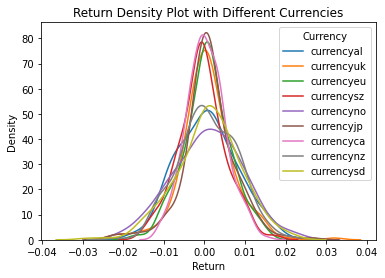

In [8]:
# plot historical return distribution
currency = ['currencyal', 'currencyuk', 'currencyeu', 'currencysz', 'currencyno',
       'currencyjp', 'currencyca', 'currencynz', 'currencysd']
for i in currency:
    # Subset to the currency
    subset = df_ret_ex[i]
    
    # Draw the density plot
    sns.kdeplot(subset,
                 label = i)
    plt.legend(prop={'size': 10}, title = 'Currency')
    plt.title('Return Density Plot with Different Currencies')
    plt.xlabel('Return')
    plt.ylabel('Density')

Plot historical return curve.

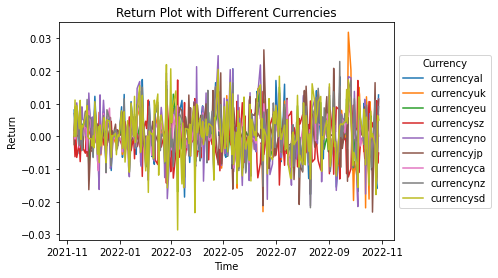

In [9]:
# historical return
dates = matplotlib.dates.date2num(date)

for i in currency:
    # Subset to the currency
    subset = df_ret[i]
    subset = subset.to_frame()

    # Draw the density plot
    plt.plot_date(dates, subset, label = i, linestyle = '-', marker = '')
    plt.legend(prop={'size': 10}, title = 'Currency', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Return Plot with Different Currencies')
    plt.xlabel('Time')
    plt.ylabel('Return')

#### Normal distribution Assumption
We then assume the return of each foreign currency is normally distributed, based on this assumption we calculate the Value at Risk value.

Assume the currency return is normally distributed, we plot the normal distribution of the return for each currency.

In [10]:
def NVaR(df_ret, alpha=5):
    avg_ret = df_ret.mean() 
    std_ret = np.std(df_ret) 
    avg_std = pd.concat([avg_ret, std_ret], axis=1) # get mean and std for each currency
    # get Normal Distribution Dataframe for each currency
    x = np.arange(-0.05,0.05,0.001)
    norm_dist = pd.DataFrame()
    for i in range(0,len(avg_std)):
        norm_dist_ar = norm.pdf(x,avg_std.iloc[i,0], avg_std.iloc[i,1]) # build ND curve
        norm_dist_df = pd.DataFrame(norm_dist_ar)
        norm_dist = pd.concat([norm_dist, norm_dist_df], axis=1) 
    norm_dist.columns = ['AL','UK','EU','SZ','NO','YJP','CA','NZ','SD']
    # get VaR value
    VaR_1_list = []
    for i in range(0,len(avg_std)):
        VaR_i = norm.ppf(alpha/100, avg_std.iloc[i,0], avg_std.iloc[i,1])
        VaR_1_list.append(VaR_i)
    return norm_dist, VaR_1_list

norm_dist, VaR_1_list = NVaR(df_ret, alpha=5)
print(VaR_1_list)

[-0.011638369604485705, -0.010273351541585601, -0.00883584051097719, -0.010044943881878717, -0.013397638523068632, -0.009611496024633848, -0.007520203340556274, -0.010939776673986847, -0.012176071099247586]


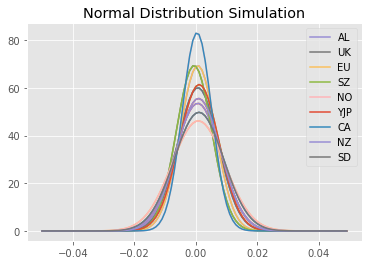

In [21]:
# Normal Distribution Simulation Plot
x = np.arange(-0.05,0.05,0.001)
plt.plot(x, norm_dist)
lo = plt.plot(x, norm_dist)
plt.legend(iter(lo),('AL','UK','EU','SZ','NO','YJP','CA','NZ','SD'))
plt.title('Normal Distribution Simulation')
plt.savefig("ND.png")
plt.show()

#### Monte Carlo Simulation
Lastly we use Monte Carlo simulation method, that is we simulate n path of the exchange rate and return, and then calculate the VaR of the simulated value.

In [11]:
# plot simulation of exchange rate
style.use('ggplot')
num_simulations = 10
num_days = 252
last_price = df.iloc[-1,:] # Series of last price of 9 currencies
last_ret = df_ret.iloc[-1,:]
daily_vol = df_ret.std() # Series of vol of 9 currencies
c_list = ['AL','UK','EU','SZ','NO','YJP','CA','NZ','SD']

In [12]:
# define VaR Calculation function
def mcVaR(simulation_df_ret, alpha =5):  
    if isinstance(simulation_df_ret, pd.Series):
        return np.percentile(simulation_df_ret,alpha)
    else:
        raise TypeError("Expected a pandas data series.")

In [13]:
avg_ret = df_ret.mean()
std_ret = np.std(df_ret)

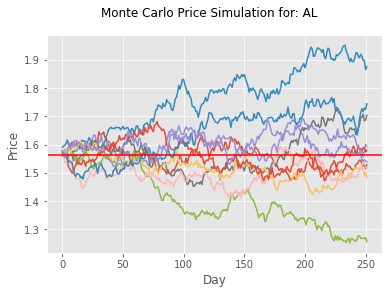

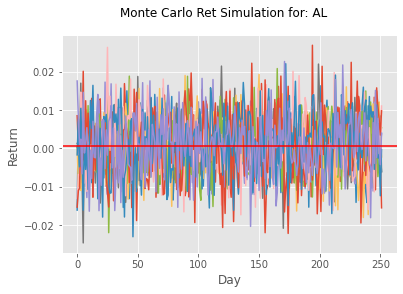

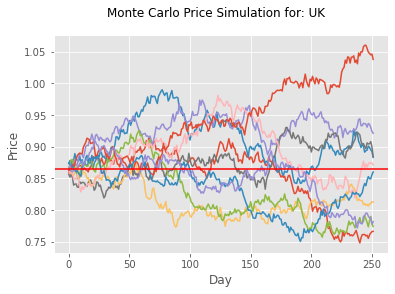

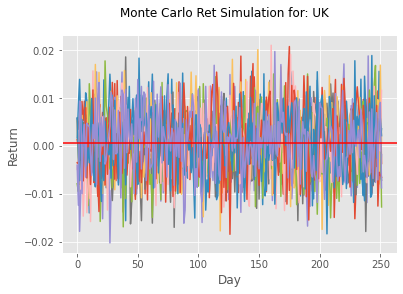

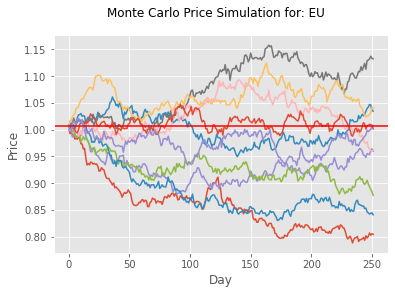

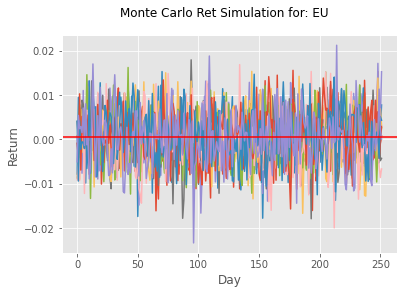

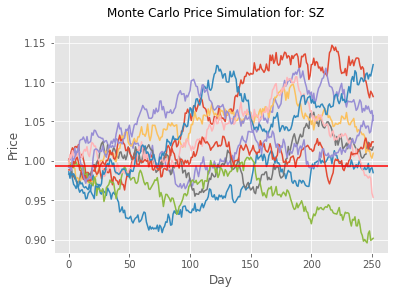

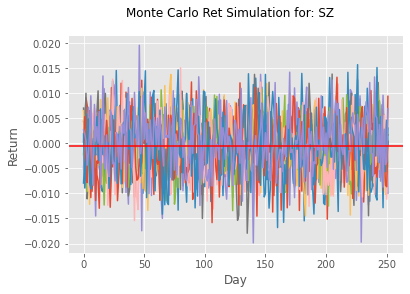

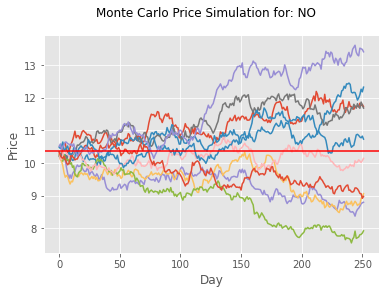

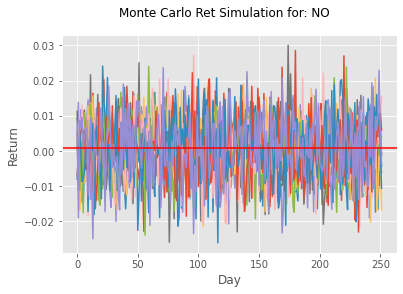

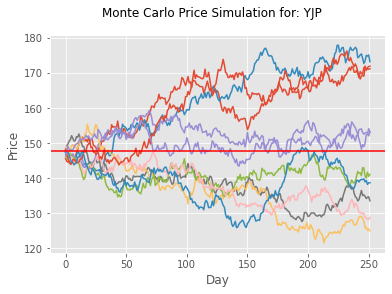

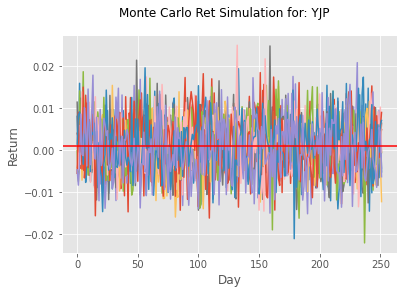

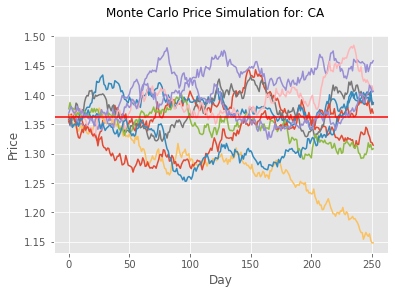

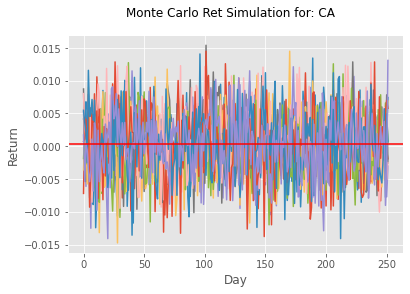

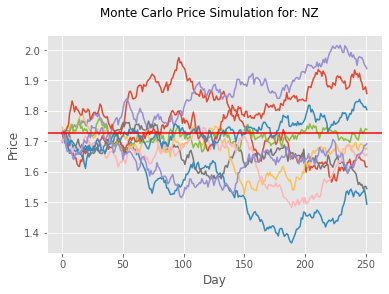

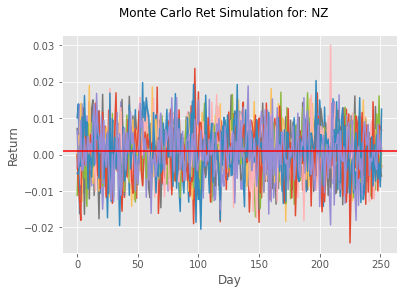

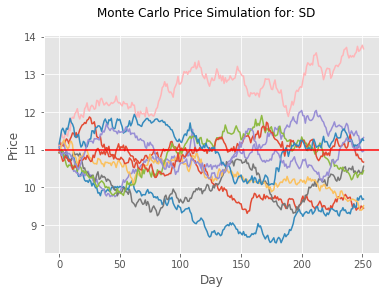

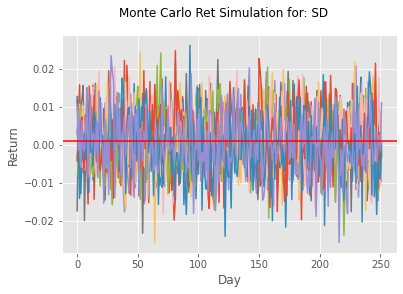

[-0.0113362338321472, -0.010958090067943902, -0.005574289524856331, -0.007994226171157519, -0.014001778028243235, -0.009595472054446288, -0.0028164979150075973, -0.0047994207718378284, -0.006307836946990766]


In [14]:
# plot MC simulations with Prices and Returns
VaR_3_list = []
for i in range(0,len(last_price)): #(0,9)
    simulation_df_rate = pd.DataFrame()
    simulation_df_ret = pd.DataFrame()
    # VaR_3_list = []
    for x in range(num_simulations): 
        count = 0
        daily_voli = daily_vol[i]

        price_series = []
        price = last_price[i] * (1+np.random.normal(0,daily_vol[i]))
        price_series.append(price)

        ret_series = []
        ret = random.normalvariate(avg_ret[i], std_ret[i])
        ret_series.append(ret)

        for y in range(num_days):
            if count == 251 :
                break
            price = price_series[count] * (1+ np.random.normal(0,daily_vol[i]))
            price_series.append(price)
            ret = random.normalvariate(avg_ret[i], std_ret[i])
            ret_series.append(ret)
            count += 1

        simulation_df_rate[x] = price_series
        simulation_df_ret[x] = ret_series

    # plot price simulation
    plt.plot(simulation_df_rate)
    plt.suptitle('Monte Carlo Price Simulation for: ' + c_list[i])
    plt.axhline(y = last_price[i], color = 'r', linestyle = '-')
    plt.xlabel('Day')
    plt.ylabel('Price')
    # plt.savefig('currency%d_price.png' % i)
    plt.show()

    # plot ret simulation
    plt.plot(simulation_df_ret)
    plt.suptitle('Monte Carlo Ret Simulation for: ' + c_list[i])
    plt.axhline(y = avg_ret[i], color = 'r', linestyle = '-')
    plt.xlabel('Day')
    plt.ylabel('Return')
    # plt.savefig('currency%d_ret.png' % i)
    plt.show()

    # Calculate VaR using return simulation
    portResults = pd.Series(simulation_df_ret.iloc[-1,:])
    VaR_3 = mcVaR(portResults, alpha=5)
    VaR_3_list.append(VaR_3)

print(VaR_3_list)

## VaR Table

In [15]:
# aggregate VaR Table
V1 = pd.DataFrame(VaR_1_list)
V2 = pd.DataFrame(VaR_2_list)
V3 = pd.DataFrame(VaR_3_list)
VaR = pd.concat([V1,V2,V3], axis=1) 
VaR.columns = ['ND VaR', 'Historical VaR', 'Monte Carlo Simulation VaR']
currency = ['AL','UK','EU','SZ','NO','YJP','CA','NZ','SD']
VaR.insert(0,"Currency", currency, True)
print(VaR)
# save as csv
VaR.to_csv('VaR.csv')

  Currency    ND VaR  Historical VaR  Monte Carlo Simulation VaR
0       AL -0.011638       -0.010392                   -0.011336
1       UK -0.010273       -0.008992                   -0.010958
2       EU -0.008836       -0.009431                   -0.005574
3       SZ -0.010045       -0.010602                   -0.007994
4       NO -0.013398       -0.013790                   -0.014002
5      YJP -0.009611       -0.009258                   -0.009595
6       CA -0.007520       -0.007332                   -0.002816
7       NZ -0.010940       -0.011092                   -0.004799
8       SD -0.012176       -0.012922                   -0.006308


Conclusion: 

We set alpha value to 5, so we want to look at how much we lose at a 5% of chance in one day. In all of the three method we see NO has the lowest VaR, thus is relatively risky than other currencies.

## Historical Volatility Method
We can also calculate volatility of return to measure the riskness of the asset.


First we plot the historical return distribution.

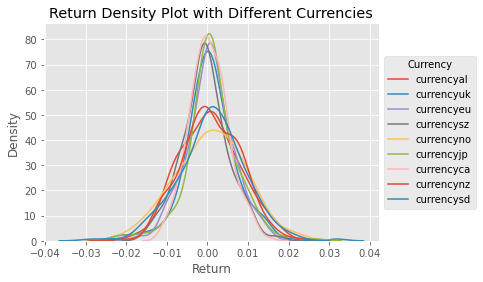

In [16]:
# plot historical return distribution
currency = ['currencyal', 'currencyuk', 'currencyeu', 'currencysz', 'currencyno',
       'currencyjp', 'currencyca', 'currencynz', 'currencysd']
for i in currency:
    # Subset to the currency
    subset = df_ret_ex[i]
    
    # Draw the density plot
    sns.kdeplot(subset,
                 label = i)
    plt.legend(prop={'size': 10}, title = 'Currency', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Return Density Plot with Different Currencies')
    plt.xlabel('Return')
    plt.ylabel('Density')

Then we plot historical return.

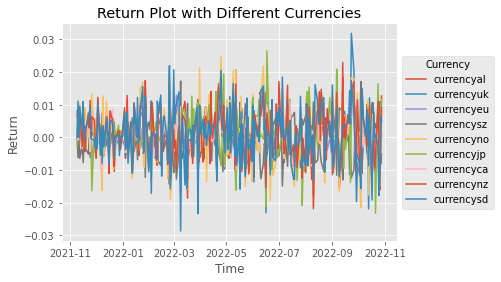

In [17]:
# historical return
dates = matplotlib.dates.date2num(date)

for i in currency:
    # Subset to the currency
    subset = df_ret[i]
    subset = subset.to_frame()

    # Draw the density plot
    plt.plot_date(dates, subset, label = i, linestyle = '-', marker = '')
    plt.legend(prop={'size': 10}, title = 'Currency',loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Return Plot with Different Currencies')
    plt.xlabel('Time')
    plt.ylabel('Return')

We want to calculate the volatility of price of each currency.

In [18]:
df_replace = df.dropna()
df_replace = df_replace.apply(pd.to_numeric)

In [19]:
# daily price volatility
daily_vol = df.std()
print(daily_vol)
# annual price volatility
annual_vol = df.std() * np.sqrt(252)
print(annual_vol)

currencyal     0.061957
currencyuk     0.052058
currencyeu     0.049658
currencysz     0.055870
currencyno     0.625246
currencyjp    11.416770
currencyca     0.032930
currencynz     0.096866
currencysd     0.700157
dtype: float64
currencyal      0.983539
currencyuk      0.826387
currencyeu      0.788298
currencysz      0.886911
currencyno      9.925465
currencyjp    181.235613
currencyca      0.522746
currencynz      1.537700
currencysd     11.114646
dtype: float64


From the result of the daily volatility calculated, we see currency yjp has the highest volatility.

## Variance-Covariance Martix of Currency
We want to see the correlation among the currencies.

<AxesSubplot:>

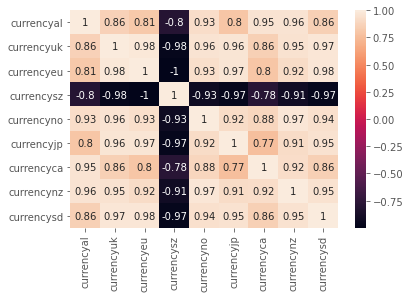

In [20]:
cormat = df.corr()
round(cormat,2)
sns.heatmap(cormat,annot=True)

We can see all the G10 currencies' exchange to USD are highly correlated, and Swiss Franc has a negative correlation with all other currencies. This gives us intuition that it's hard to do risk diversification using only G10 currencies since they are highly correlated, also the investor can use swiss franc to hedge against risk.